In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [2]:
# Step 1: Data Collection and Preprocessing
# Read the dataset from a text file
with open("dataset.txt", "r", encoding="utf-8") as file:
    text_data = file.readlines()
    
# Assuming 'text_data' is your text dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)

total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [8]:


# Pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = tf.keras.utils.to_categorical(label, num_classes=total_words)


8


In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(300))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])


In [5]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 4s 57ms/step - loss: 3.3801 - accuracy: 0.0417
Epoch 2/100
2/2 [==============================] - 0s 72ms/step - loss: 3.0842 - accuracy: 0.1458
Epoch 3/100
2/2 [==============================] - 0s 53ms/step - loss: 3.0483 - accuracy: 0.2917
Epoch 4/100
2/2 [==============================] - 0s 68ms/step - loss: 2.8473 - accuracy: 0.2500
Epoch 5/100
2/2 [==============================] - 0s 59ms/step - loss: 2.6780 - accuracy: 0.3542
Epoch 6/100
2/2 [==============================] - 0s 70ms/step - loss: 2.4828 - accuracy: 0.3750
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 2.2682 - accuracy: 0.3750
Epoch 8/100
2/2 [==============================] - 0s 79ms/step - loss: 1.9761 - accuracy: 0.4375
Epoch 9/100
2/2 [==============================] - 0s 65ms/step - loss: 1.6904 - accuracy: 0.5208
Epoch 10/100
2/2 [==============================] - 0s 48ms/step - loss: 1.3672 - accuracy: 0.5833
Epoch 11/100
2/2 [=

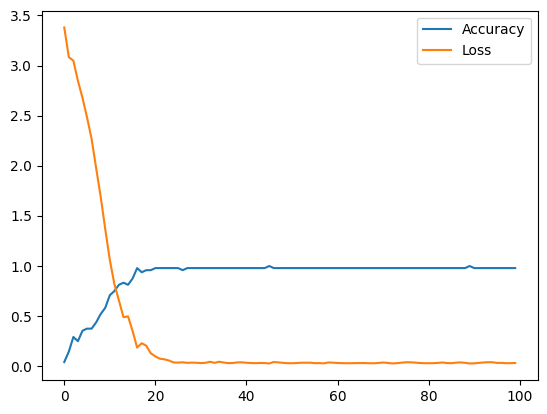

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["loss"], label="Loss")
plt.legend()

In [7]:
model.save("gpt_model")

INFO:tensorflow:Assets written to: gpt_model\assets


INFO:tensorflow:Assets written to: gpt_model\assets


In [8]:
# Step 7: Fine-Tuning (Optional)
# Fine-tuning can be performed by adjusting model architecture or hyperparameters.

# Step 8: Inference (Text Generation)
while True:
    seed_text = input()
    prev = seed_text
    if seed_text == "q":
        break
    elif seed_text == "":
        print("Cannot accept empty field!")
    else:


        next_words = 100
        generated_text = ""

        while True:
            token_list = tokenizer.texts_to_sequences([seed_text])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
            predicted_probs = model.predict(token_list, verbose=0)[0]
            predicted_index = np.argmax(predicted_probs)
            predicted_word = tokenizer.index_word[predicted_index]
            # Check if the predicted word is not already in the generated text
            if predicted_word not in generated_text:
                if predicted_word == "end":
                    break
                else:
                    seed_text += " " + predicted_word
                    generated_text += predicted_word + " "
            else:
                break
        
        print("You: ", prev)
        print("Bot: ", generated_text)

You:  who are you
Bot:  gpt model 
Cannot accept empty field!
You:  Hello
Bot:  hi 
Cannot accept empty field!
You:  how are you
Bot:  am fine and you 
You:  am good
Bot:  that is good 
Cannot accept empty field!
